In [1]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [13]:
x <- c(1,2,3,4,5,6)
y<- c(1, 4.02, 5.9, 8.11, 10.02, 11.99)
mydata <- data.frame(x,y)

In [14]:
print(mydata)

  x     y
1 1  1.00
2 2  4.02
3 3  5.90
4 4  8.11
5 5 10.02
6 6 11.99


In [15]:
linefit <- lm(y~x, data=mydata)

In [16]:
summary(linefit)


Call:
lm(formula = y ~ x, data = mydata)

Residuals:
       1        2        3        4        5        6 
-0.47143  0.40114  0.13371  0.19629 -0.04114 -0.21857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.67600    0.32551  -2.077    0.106    
x            2.14743    0.08358  25.692 1.36e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3497 on 4 degrees of freedom
Multiple R-squared:  0.994,	Adjusted R-squared:  0.9925 
F-statistic: 660.1 on 1 and 4 DF,  p-value: 1.363e-05


In [17]:
coefficients(linefit)

(Intercept)           x 
  -0.676000    2.147429

In [38]:
B <- coefficients(linefit)[[1]]
B

[1] -0.676

In [39]:
A <- coefficients(linefit)[[2]]
A

[1] 2.147429

In [36]:
stderror = sigma(linefit)
stderror

[1] 0.3496549

In [37]:
confint(linefit)

,2.5 %,97.5 %
(Intercept),-1.579763,0.2277635
x,1.915364,2.3794936


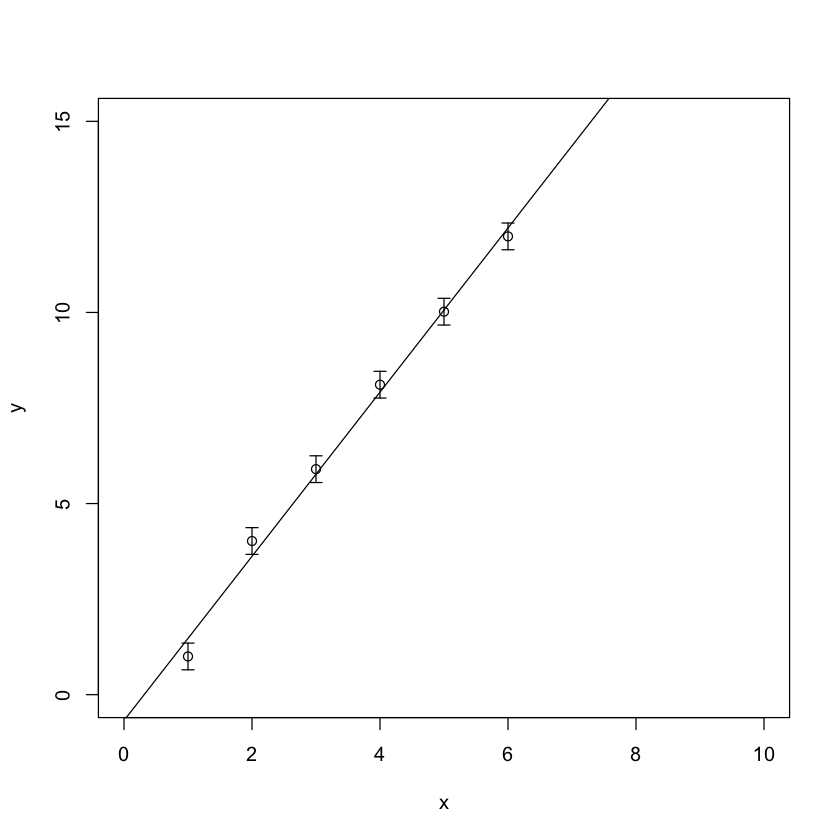

In [21]:
plot(x, y, xlab = "x", ylab = "y", 
     xlim = c(0,10), ylim = c(0, 15))
abline(coefficients(linefit))
arrows(x, y - sigma(linefit), 
       x, y + sigma(linefit), 
       length = 0.05, angle = 90, code = 3)


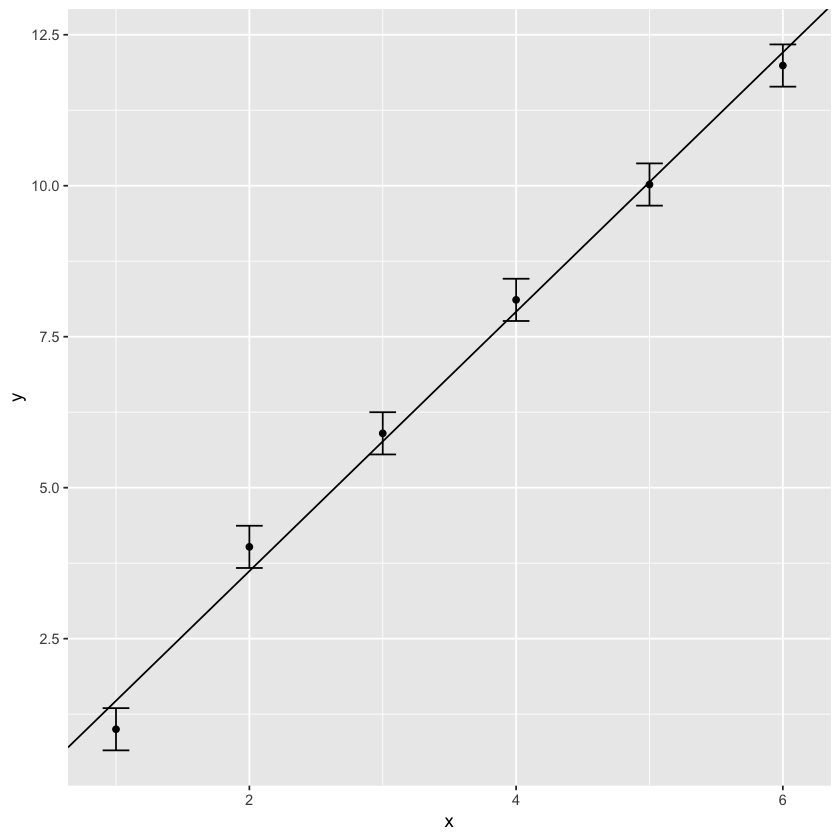

In [41]:
plt <- ggplot(mydata, aes(x=x, y=y)) + 
    geom_point() +
    geom_errorbar(aes(ymin=y-stderror, ymax=y+stderror), width=.2,
                 position=position_dodge(0.05)) +
    geom_abline(slope=A, intercept=B)
print(plt)